In [557]:
import pandas as pd
import numpy as np

import seaborn as sns
import networkx as nx
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Patch
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import xgboost as xgb

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



# Data Analysis Begins

- Load data

In [558]:
crime_dataframe = pd.read_excel('../data/tentative_final.xlsx')
df = crime_dataframe.set_index(['County', 'Year'])
df.head()


Population  crime_rate  clearance_rate  population_density  \
County  Year                                                               
Alameda 2010     1510271    0.006931        0.002266         2046.437669   
        2011     1527169    0.007062        0.002078         2069.334688   
        2012     1549193    0.007681        0.001902         2099.177507   
        2013     1575139    0.007453        0.001877         2134.334688   
        2014     1597747    0.006482        0.001927         2164.968835   

              unemployment_rate  adjusted_income  poverty_rate  rent_burden  \
County  Year                                                                  
Alameda 2010               11.2       294.981910          13.5         42.4   
        2011               10.3       288.906538          13.2         42.3   
        2012                8.8       294.803804          13.1         42.6   
        2013                7.3       298.514628          13.0         42.6   
        2014                5.9       312.921908          12.5         43.0   

              home_ownership_rate  mobile_home_ratio  ...  adj_prison_budget  \
County  Year                                          ...                      
Alameda 2010             0.551246           0.012387  ...           0.664076   
        2011             0.545447           0.012529  ...           0.649141   
        2012             0.537406           0.012231  ...           0.611663   
        2013             0.531967           0.012731  ...           0.600055   
        2014             0.528597           0.012210  ...           0.631766   

              median_house_value  house_affordability  Category  \
County  Year                                                      
Alameda 2010              590900             8.827704     Urban   
        2011              558300             8.296307     Urban   
        2012              514900             7.333818     Urban   
        2013              493800             6.846162     Urban   
        2014              509300             6.614629     Urban   

              Category_encoded  Category_Rural  Category_Suburban  \
County  Year                                                        
Alameda 2010                 2               0                  0   
        2011                 2               0                  0   
        2012                 2               0                  0   
        2013                 2               0                  0   
        2014                 2               0                  0   

              Category_Urban  uninsured_rate  high_school_rate  
County  Year                                                    
Alameda 2010               1        0.132639              85.9  
        2011               1        0.128512              86.0  
        2012               1        0.123669              86.2  
        2013               1        0.125603              41.8  
        2014               1        0.117792              86.7  

[5 rows x 41 columns]

In [559]:
crime_dataframe_nan = pd.read_excel('../data/tentative_final_with_NaN.xlsx')
df_nan = crime_dataframe_nan.copy()
df_nan

,County,Year,Population,crime_rate,clearance_rate,population_density,unemployment_rate,adjusted_income,poverty_rate,rent_burden,...,adj_prison_budget,median_house_value,house_affordability,Category,Category_encoded,Category_Rural,Category_Suburban,Category_Urban,uninsured_rate,high_school_rate
0,Alameda,1985,1185500,0.009809,0.004580,1606.368564,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Urban,2,0,0,1,NaN,NaN
1,Alameda,1986,1206900,0.010353,0.004615,1635.365854,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Urban,2,0,0,1,NaN,NaN
2,Alameda,1987,1220600,0.009588,0.005164,1653.929539,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Urban,2,0,0,1,NaN,NaN
3,Alameda,1988,1242300,0.008825,0.004595,1683.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Urban,2,0,0,1,NaN,NaN
4,Alameda,1989,1261200,0.008375,0.004163,1708.943089,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Urban,2,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Yuba,2019,79619,0.004095,0.001683,126.379365,6.2,201.708250,15.2,41.5,...,1.290150,257100.0,4.541841,Rural,0,1,0,0,0.072427,82.3
2258,Yuba,2020,81178,0.004977,0.001983,128.853968,10.6,197.248655,16.3,37.5,...,1.278197,273600.0,4.861580,Rural,0,1,0,0,0.071218,82.2
2259,Yuba,2021,82091,0.004312,0.001815,130.303175,8.4,204.337343,15.6,39.3,...,1.338206,286000.0,4.706734,Rural,0,1,0,0,0.070699,81.2
2260,Yuba,2022,82563,0.003379,0.001466,131.052381,5.6,199.314588,14.9,39.5,...,1.309347,350600.0,5.510326,Rural,0,1,0,0,0.069229,82.7


## Use ColumnTransformer and SimpleImputer to replace NaN with some data.

In [560]:
columns_with_nan = [col for col in df_nan.columns if df_nan[col].isnull().any()]
columns_without_nan = [col for col in df_nan.columns if not df_nan[col].isnull().any()]

In [561]:
numeric_features_mean = [
    'unemployment_rate', 'adjusted_income', 'poverty_rate', 'rent_burden',
    'home_ownership_rate', 'mobile_home_ratio', 'vacancy_rate', 'Total_Persons_Owner', 
    'Total_Persons_Renter', 'Total_Persons', 'Number_of_Persons_per_HseHld', 
    'police_budget', 'education_budget', 'welfare_budget', 'mental_health_budget', 
    'rehab_budget', 'health_budget', 'judiciary_budget', 'prison_budget', 'adj_police_budget', 
    'adj_education_budget', 'adj_welfare_budget', 'adj_mental_health_budget', 'adj_rehab_budget', 
    'adj_health_budget', 'adj_judiciary_budget', 'adj_prison_budget',
    'high_school_rate', 'uninsured_rate', 'house_affordability'
       
]
numeric_features_median = ['median_age', 'median_house_value']

# Create transformers for the columns
mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')) # Fill NaN with mean
])

median_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')) # Fill NaN with median
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
       ('numeric_mean', mean_transformer, numeric_features_mean),
       ('numeric_median', median_transformer, numeric_features_median)
    ]
)

# Apply the transformation
df_transformed = preprocessor.fit_transform(crime_dataframe_nan)

# Convert the transformed array back to a Dataframe
df_cleaned = pd.DataFrame(df_transformed, columns=numeric_features_mean+numeric_features_median)

# Add untouched colmns back
clean_dataframe = pd.concat([df_nan[columns_without_nan].reset_index(drop=True), df_cleaned], axis=1)

In [562]:
final_dataframe = clean_dataframe.copy()
final_dataframe = final_dataframe.set_index(['County', 'Year'])

In [563]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2262 entries, ('Alameda', np.int64(1985)) to ('Yuba', np.int64(2023))
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Population                    2262 non-null   int64  
 1   crime_rate                    2262 non-null   float64
 2   clearance_rate                2262 non-null   float64
 3   population_density            2262 non-null   float64
 4   Category                      2262 non-null   object 
 5   Category_encoded              2262 non-null   int64  
 6   Category_Rural                2262 non-null   int64  
 7   Category_Suburban             2262 non-null   int64  
 8   Category_Urban                2262 non-null   int64  
 9   unemployment_rate             2262 non-null   float64
 10  adjusted_income               2262 non-null   float64
 11  poverty_rate                  2262 non-null   float64
 12  rent_burden     

### Dependent and Independent variables

In [564]:
target = ['crime_rate']
features = [
    "Population", "clearance_rate", "population_density", "mobile_home_ratio", "poverty_rate", 
    "adjusted_income", "unemployment_rate", "high_school_rate", 
    "uninsured_rate", "house_affordability", "adj_police_budget", "adj_education_budget",
    "adj_welfare_budget", "adj_mental_health_budget", "adj_rehab_budget", "adj_health_budget", 
    "adj_judiciary_budget", "adj_prison_budget", "home_ownership_rate", "rent_burden",
]

### Dataframe to work with

In [565]:

final_dataframe = final_dataframe[target + features]

In [566]:
print(final_dataframe.isnull().sum())  # For pandas DataFrame
print(np.isnan(final_dataframe).sum())  # For numpy array
print(np.isinf(final_dataframe).sum())  # Check for infinite values

crime_rate                  0
Population                  0
clearance_rate              0
population_density          0
mobile_home_ratio           0
poverty_rate                0
adjusted_income             0
unemployment_rate           0
high_school_rate            0
uninsured_rate              0
house_affordability         0
adj_police_budget           0
adj_education_budget        0
adj_welfare_budget          0
adj_mental_health_budget    0
adj_rehab_budget            0
adj_health_budget           0
adj_judiciary_budget        0
adj_prison_budget           0
home_ownership_rate         0
rent_burden                 0
dtype: int64
crime_rate                  0
Population                  0
clearance_rate              0
population_density          0
mobile_home_ratio           0
poverty_rate                0
adjusted_income             0
unemployment_rate           0
high_school_rate            0
uninsured_rate              0
house_affordability         0
adj_police_budget          

### The correlation matrix. 
This determines which variables are corrrelated. It helps in feature selection.

In [567]:
correlation_matrix = final_dataframe.corr()
correlation_matrix

,crime_rate,Population,clearance_rate,population_density,mobile_home_ratio,poverty_rate,adjusted_income,unemployment_rate,high_school_rate,uninsured_rate,...,adj_police_budget,adj_education_budget,adj_welfare_budget,adj_mental_health_budget,adj_rehab_budget,adj_health_budget,adj_judiciary_budget,adj_prison_budget,home_ownership_rate,rent_burden
crime_rate,1.000000,0.203885,0.800376,0.246398,0.037647,0.131874,-0.094708,0.098172,-0.006866,-0.014058,...,0.117363,0.132762,0.186243,0.126957,0.111665,0.118997,0.079818,0.054861,-0.056266,-0.059855
Population,0.203885,1.000000,0.072580,0.208813,-0.205892,-0.053543,0.155563,-0.148123,-0.020288,0.062790,...,-0.065494,-0.070518,-0.044805,-0.086246,-0.072251,-0.075377,-0.043463,-0.156414,-0.244270,0.093555
clearance_rate,0.800376,0.072580,1.000000,0.007162,0.137587,0.154600,-0.162463,0.135535,-0.028028,0.017193,...,0.055067,0.066264,0.129819,0.083550,0.053670,0.059241,0.057207,0.059205,0.015957,-0.023501
population_density,0.246398,0.208813,0.007162,1.000000,-0.190359,-0.119282,0.266618,-0.175189,0.035034,-0.081868,...,-0.025818,-0.020553,-0.042787,-0.027720,-0.025045,-0.021723,-0.017331,-0.052714,-0.302626,-0.131402
mobile_home_ratio,0.037647,-0.205892,0.137587,-0.190359,1.000000,0.390090,-0.597275,0.119834,-0.010715,0.077216,...,-0.053395,-0.118236,0.269796,0.032210,0.003642,-0.012184,0.094290,0.397132,0.300641,0.090119
poverty_rate,0.131874,-0.053543,0.154600,-0.119282,0.390090,1.000000,-0.754137,0.368657,-0.338405,0.534838,...,-0.013809,0.002661,0.467269,0.040001,0.027934,-0.013697,-0.046008,-0.037866,-0.147514,0.276460
adjusted_income,-0.094708,0.155563,-0.162463,0.266618,-0.597275,-0.754137,1.000000,-0.339544,0.202019,-0.394424,...,-0.088287,-0.010630,-0.448693,-0.134680,-0.073930,-0.101621,-0.077801,-0.182258,-0.189437,-0.172376
unemployment_rate,0.098172,-0.148123,0.135535,-0.175189,0.119834,0.368657,-0.339544,1.000000,-0.235066,0.383431,...,-0.015097,-0.006903,0.127368,-0.040515,-0.035063,-0.032844,-0.002446,-0.053041,-0.000861,0.053648
high_school_rate,-0.006866,-0.020288,-0.028028,0.035034,-0.010715,-0.338405,0.202019,-0.235066,1.000000,-0.450170,...,0.109854,0.086210,0.001515,0.134750,0.124380,0.131764,0.092861,0.078672,0.202869,-0.120455
uninsured_rate,-0.014058,0.062790,0.017193,-0.081868,0.077216,0.534838,-0.394424,0.383431,-0.450170,1.000000,...,0.036254,0.002752,0.089394,-0.077534,0.000313,-0.015947,0.108453,-0.063862,-0.132479,0.227971


### A seaborn heatmap showing correlation amongst the variables.

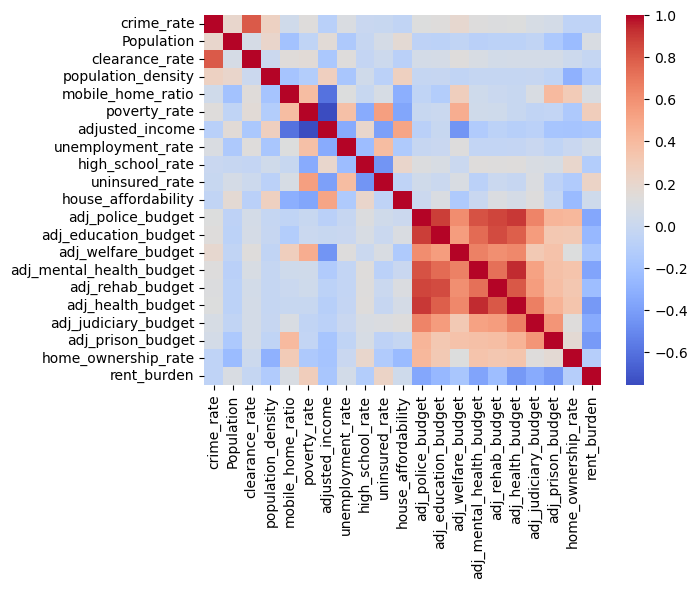

In [568]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm' , cbar=True)
plt.show()

### A seabon clustermap

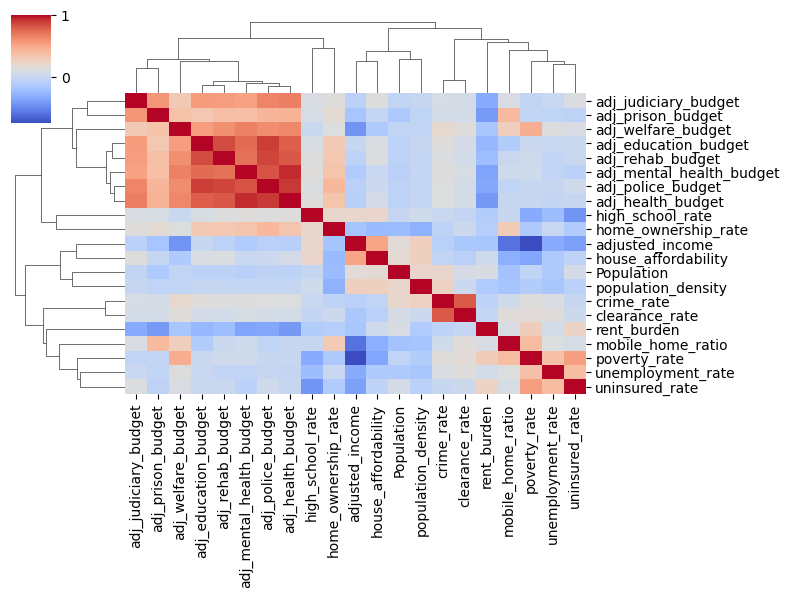

In [569]:
# Create a clustermap
sns.clustermap(correlation_matrix, cmap="coolwarm", figsize=(8, 6))
plt.show()

### A network graph visualizing the correlation 

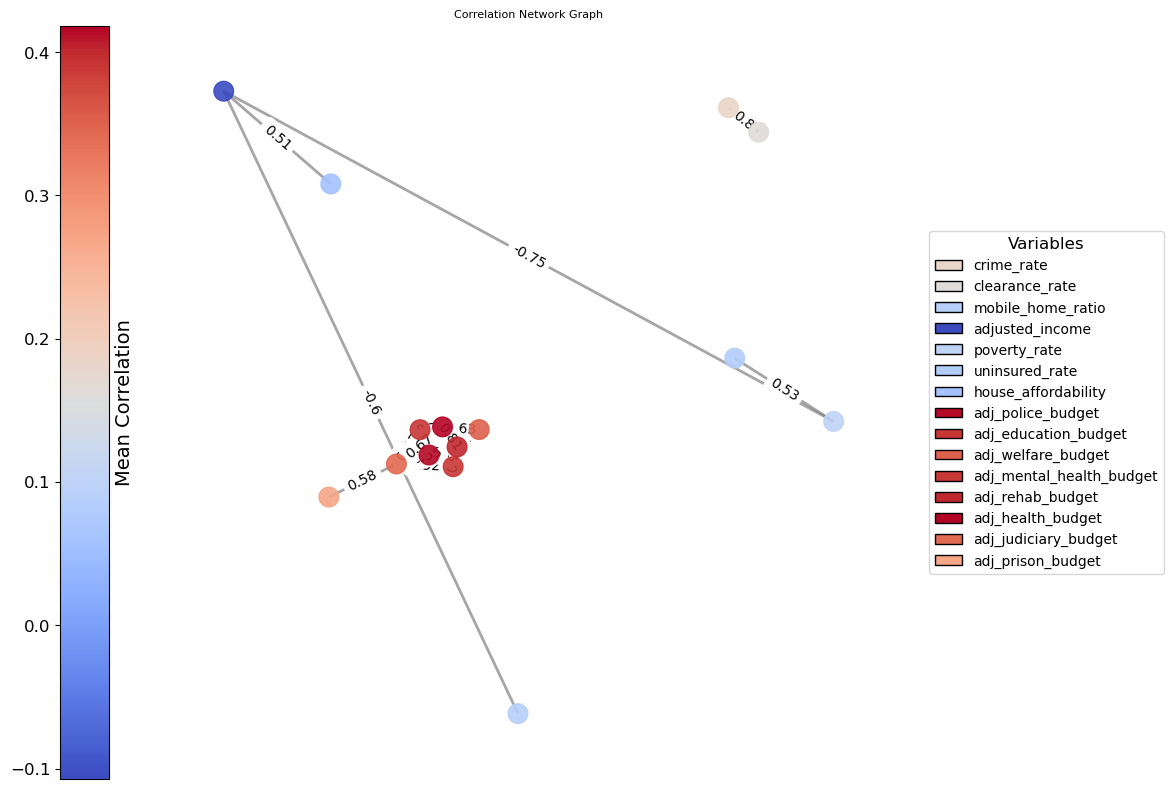

In [570]:

# Create a network graph
G = nx.Graph()

# Add nodes and edges based on correlation threshold
threshold = 0.5
for i in correlation_matrix.columns:
    for j in correlation_matrix.index:
        if i != j and abs(correlation_matrix.loc[i, j]) > threshold:
            # Add weighted edges
            G.add_edge(i, j, weight=correlation_matrix.loc[i, j])

# Filter the node_colors to include only the nodes present in the graph
graph_nodes = list(G.nodes)
node_colors = correlation_matrix.loc[graph_nodes, graph_nodes].mean(axis=0)  # Compute mean only for graph nodes
norm = mcolors.Normalize(vmin=node_colors.min(), vmax=node_colors.max())  # Normalize for color mapping
cmap = plt.cm.coolwarm  # Colormap for the nodes
node_colors_mapped = [cmap(norm(value)) for value in node_colors]  # Map values to colors

# Layout for nodes
pos = nx.spring_layout(G, seed=42)  # Force-directed layout for better spacing

# Start the plot with customized figure layout
fig = plt.figure(figsize=(12, 8))
grid = fig.add_gridspec(1, 3, width_ratios=[0.05, 0.75, 0.2])  # Adjust width_ratios for a thinner cbar
ax_cbar = fig.add_subplot(grid[0])  # Color bar on the left
ax_main = fig.add_subplot(grid[1])  # Main graph in the center
ax_legend = fig.add_subplot(grid[2])  # Legend on the right

# Draw the main graph
nx.draw_networkx_nodes(
    G, pos, node_size=200, node_color=node_colors_mapped, alpha=0.9, ax=ax_main
)
nx.draw_networkx_edges(G, pos, width=2, edge_color="gray", alpha=0.7, ax=ax_main)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)},
    font_size=10, font_color="black", ax=ax_main
)
ax_main.set_title("Correlation Network Graph", fontsize=8,)
ax_main.axis("off")  # Hide axis for the graph

# Add resized color bar with larger fonts
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=ax_cbar, orientation="vertical")
cbar.ax.tick_params(labelsize=12)  # Increase tick label font size
cbar.set_label("Mean Correlation", fontsize=14)  # Increase color bar label font size
ax_cbar.yaxis.tick_left()

# Create a legend on the right
ax_legend.axis("off")  # Hide the axes for the legend panel
legend_elements = [
    Patch(facecolor=cmap(norm(value)), edgecolor="black", label=f"{node}")
    for node, value in zip(graph_nodes, node_colors)
]
ax_legend.legend(
    handles=legend_elements, loc="center", title="Variables", fontsize=10, title_fontsize=12
)

# Finalize the layout
plt.tight_layout()
plt.show()


In [571]:
clean_dataframe

,County,Year,Population,crime_rate,clearance_rate,population_density,Category,Category_encoded,Category_Rural,Category_Suburban,...,adj_mental_health_budget,adj_rehab_budget,adj_health_budget,adj_judiciary_budget,adj_prison_budget,high_school_rate,uninsured_rate,house_affordability,median_age,median_house_value
0,Alameda,1985,1185500,0.009809,0.004580,1606.368564,Urban,2,0,0,...,0.796553,0.113027,1.492711,0.512286,0.747925,79.921429,0.110688,5.879693,37.8,326050.0
1,Alameda,1986,1206900,0.010353,0.004615,1635.365854,Urban,2,0,0,...,0.796553,0.113027,1.492711,0.512286,0.747925,79.921429,0.110688,5.879693,37.8,326050.0
2,Alameda,1987,1220600,0.009588,0.005164,1653.929539,Urban,2,0,0,...,0.796553,0.113027,1.492711,0.512286,0.747925,79.921429,0.110688,5.879693,37.8,326050.0
3,Alameda,1988,1242300,0.008825,0.004595,1683.333333,Urban,2,0,0,...,0.796553,0.113027,1.492711,0.512286,0.747925,79.921429,0.110688,5.879693,37.8,326050.0
4,Alameda,1989,1261200,0.008375,0.004163,1708.943089,Urban,2,0,0,...,0.796553,0.113027,1.492711,0.512286,0.747925,79.921429,0.110688,5.879693,37.8,326050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Yuba,2019,79619,0.004095,0.001683,126.379365,Rural,0,1,0,...,0.796553,0.113027,0.330838,0.349174,1.290150,82.300000,0.072427,4.541841,32.8,257100.0
2258,Yuba,2020,81178,0.004977,0.001983,128.853968,Rural,0,1,0,...,0.796553,0.113027,0.347511,0.362152,1.278197,82.200000,0.071218,4.861580,33.0,273600.0
2259,Yuba,2021,82091,0.004312,0.001815,130.303175,Rural,0,1,0,...,0.796553,0.113027,0.368092,0.325340,1.338206,81.200000,0.070699,4.706734,33.2,286000.0
2260,Yuba,2022,82563,0.003379,0.001466,131.052381,Rural,0,1,0,...,0.796553,0.113027,0.310002,0.305015,1.309347,82.700000,0.069229,5.510326,33.5,350600.0


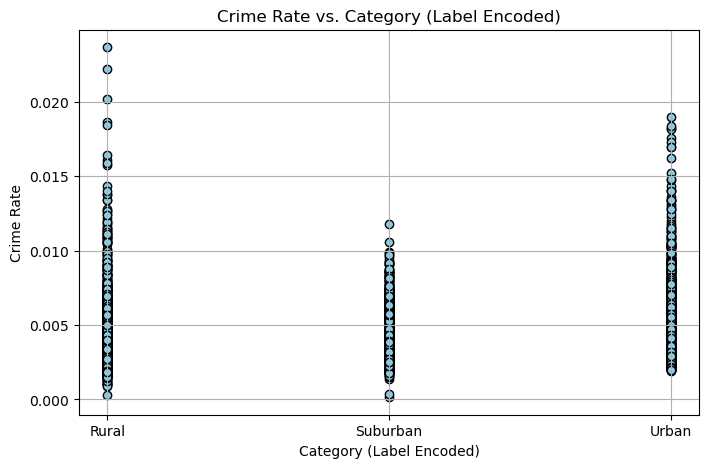

In [572]:
# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(clean_dataframe["Category_encoded"], clean_dataframe["crime_rate"], color="skyblue", edgecolor="black")
plt.xticks([0, 1, 2], ["Rural", "Suburban", "Urban"])
plt.xlabel("Category (Label Encoded)")
plt.ylabel("Crime Rate")
plt.title("Crime Rate vs. Category (Label Encoded)")
plt.grid(True)
plt.show()

C:\Users\leoaf\AppData\Local\Temp\ipykernel_9092\3784812643.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




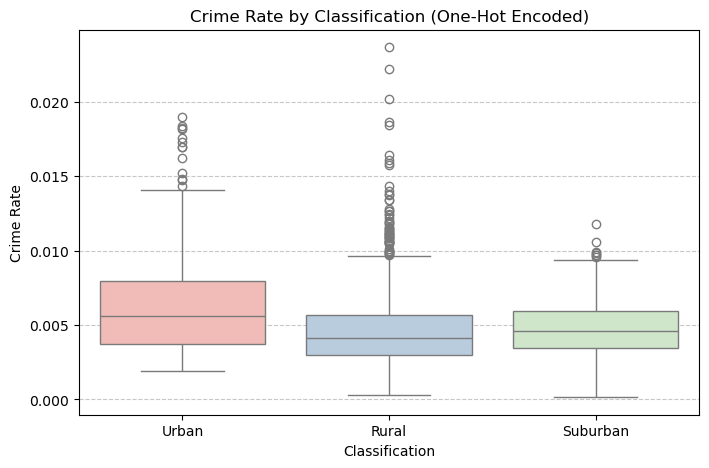

In [573]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Category", y="crime_rate", data=clean_dataframe, palette="Pastel1")
plt.title("Crime Rate by Classification (One-Hot Encoded)")
plt.xlabel("Classification")
plt.ylabel("Crime Rate")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

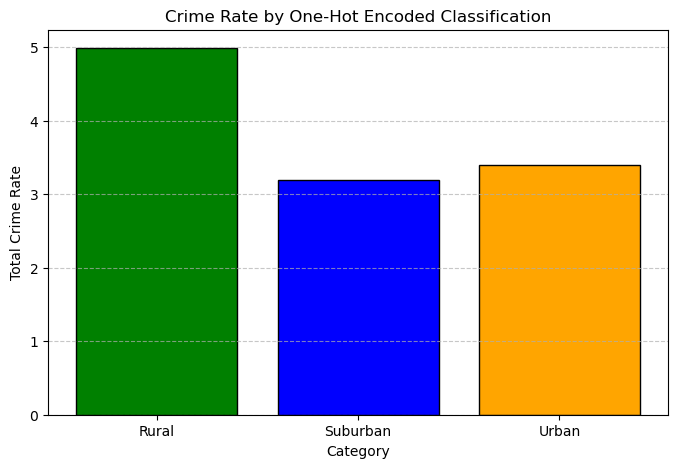

In [574]:

# Summing crime rates for each type
crime_rate_by_type = {
    "Rural": clean_dataframe["Category_Rural"].dot(clean_dataframe["crime_rate"]),
    "Suburban": clean_dataframe["Category_Suburban"].dot(clean_dataframe["crime_rate"]),
    "Urban": clean_dataframe["Category_Urban"].dot(clean_dataframe["crime_rate"])
}

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(crime_rate_by_type.keys(), crime_rate_by_type.values(), color=["green", "blue", "orange"], edgecolor="black")
plt.xlabel("Category")
plt.ylabel("Total Crime Rate")
plt.title("Crime Rate by One-Hot Encoded Classification")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Split data into train and test data

In [575]:
X = final_dataframe[features] # Independent varaibles
y = final_dataframe['crime_rate'] # Dependent variable

# Split data
train_data, test_data = train_test_split(final_dataframe, test_size=0.2, random_state=42)
X_train, y_train = train_data[features], train_data['crime_rate']
X_test, y_test = test_data[features], test_data['crime_rate']

#### Ensure split ratio is accurate.

In [576]:
# Calculate the sizes
total_rows = len(final_dataframe)
train_size = len(X_train)
test_size = len(X_test)

# Check if the split is correct
print(f"Total rows: {total_rows}")
print(f"Training rows: {train_size} ({(train_size / total_rows) * 100:.2f}%)")
print(f"Testing rows: {test_size} ({(test_size / total_rows) * 100:.2f}%)")

# Verify the split
expected_test_size = total_rows * 0.2  # 20% of total rows
print(f"Expected test size: {expected_test_size:.0f}")
print(f"Is the split ratio correct? {'Yes' if abs(test_size - expected_test_size) < 1 else 'No'}")

Total rows: 2262
Training rows: 1809 (79.97%)
Testing rows: 453 (20.03%)
Expected test size: 452
Is the split ratio correct? Yes


#### Exploratory data analysis (EDA)

In [577]:
X_train.columns

Index(['Population', 'clearance_rate', 'population_density',
       'mobile_home_ratio', 'poverty_rate', 'adjusted_income',
       'unemployment_rate', 'high_school_rate', 'uninsured_rate',
       'house_affordability', 'adj_police_budget', 'adj_education_budget',
       'adj_welfare_budget', 'adj_mental_health_budget', 'adj_rehab_budget',
       'adj_health_budget', 'adj_judiciary_budget', 'adj_prison_budget',
       'home_ownership_rate', 'rent_burden'],
      dtype='object')

### Regression Analysis

#### Multilinear regression


In [578]:
# Instantiate the models. Which ones need scaling?
lr = LinearRegression()

# Fit the models to the training data
lr.fit(X_train, y_train)

# Find the model predictions on the training set
lr_train_preds = lr.predict(X_train)

# Find the model predictions on the test set
lr_test_preds = lr.predict(X_test)

# Find the mse on the training set
lr_train_mse = mean_squared_error(y_train, lr_train_preds)
lr_train_rmse = root_mean_squared_error(y_train, lr_train_preds)
lr_train_r2 = r2_score(y_train, lr_train_preds)

# Find the mse on the test set
lr_test_mse = mean_squared_error(y_test, lr_test_preds)
lr_test_rmse = root_mean_squared_error(y_test, lr_test_preds)
lr_test_r2 = r2_score(y_test, lr_test_preds)

# Results
print(f"MLR Training MSE: {lr_train_mse} | RMSE: {lr_train_rmse} | R2 score: {lr_train_r2}")
print(f"MLR Test MSE: {lr_test_mse} | RMSE: {lr_test_rmse} | R2 score: {lr_test_r2}")

MLR Training MSE: 1.942143322618281e-06 | RMSE: 0.0013936080233043584 | R2 score: 0.7249135005545373
MLR Test MSE: 1.6314295769324995e-06 | RMSE: 0.001277274276313627 | R2 score: 0.738006808690331


#### XGboost Regression

In [579]:
xgb_model = xgb.XGBRegressor(random_state=42)


# Fit the models to the training data
xgb_model.fit(X_train, y_train)

# Find the model predictions on the training set
xgb_train_preds = xgb_model.predict(X_train)

# Find the model predictions on the test set
xgb_test_preds = xgb_model.predict(X_test)

# Find the mse on the training set
xgb_train_mse = mean_squared_error(y_train, xgb_train_preds)
xgb_train_rmse = root_mean_squared_error(y_train, xgb_train_preds)
xgb_train_r2 = r2_score(y_train, xgb_train_preds)

# Find the mse on the test set
xgb_test_mse = mean_squared_error(y_test, xgb_test_preds)
xgb_test_rmse = root_mean_squared_error(y_test, xgb_test_preds)
xgb_test_r2 = r2_score(y_test, xgb_test_preds)

# Results
print(f"XGB Training MSE: {xgb_train_mse} | RMSE: {xgb_train_rmse} | R2 score: {xgb_train_r2}")
print(f"XGB Test MSE: {xgb_test_mse} | RMSE: {xgb_test_rmse} | R2 score: {xgb_test_r2}")

XGB Training MSE: 4.151725436699395e-07 | RMSE: 0.000644338842279386 | R2 score: 0.9411946789024492
XGB Test MSE: 9.192458623489671e-07 | RMSE: 0.0009587731026415828 | R2 score: 0.8523772276288827


#### Ridge Regression

In [580]:
ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

# Fit the models to the training data
ridge_pipe.fit(X_train, y_train)

# Find the model predictions on the training set
ridge_train_preds = ridge_pipe.predict(X_train)

# Find the model predictions on the test set
ridge_test_preds = ridge_pipe.predict(X_test)

# Find the mse on the training set
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_train_rmse = root_mean_squared_error(y_train, ridge_train_preds)
ridge_train_r2 = r2_score(y_train, ridge_train_preds)

# Find the mse on the test set
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
ridge_test_rmse = root_mean_squared_error(y_test, ridge_test_preds)
ridge_test_r2 = r2_score(y_test, ridge_test_preds)

# Results
print(f"XGB Training MSE: {ridge_train_mse} | RMSE: {ridge_train_rmse} | R2 score: {ridge_train_r2}")
print(f"XGB Test MSE: {ridge_test_mse} | RMSE: {ridge_test_rmse} | R2 score: {ridge_test_r2}")

XGB Training MSE: 1.942148085156993e-06 | RMSE: 0.0013936097320114383 | R2 score: 0.724912825985319
XGB Test MSE: 1.631123246765975e-06 | RMSE: 0.001277154355105903 | R2 score: 0.738056002611452


#### Principal Component Analysis
1. Standardise the training data: give all variables equal weight.
    - Use StandardScaler from sklearn to scale your data to have a mean of 0 and standard deviation of 
    

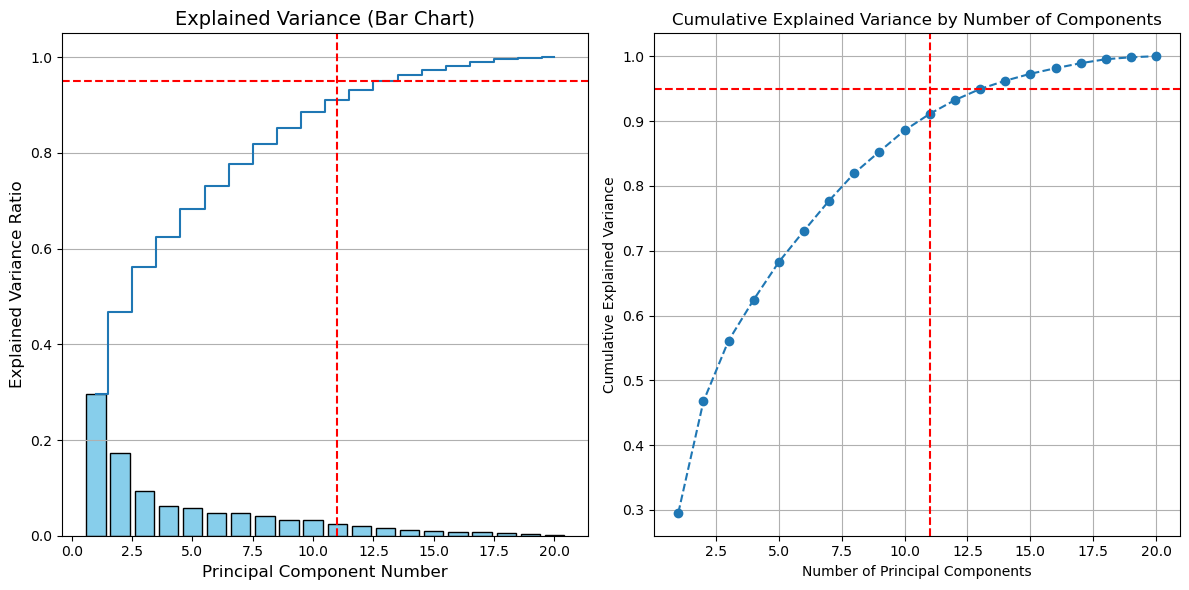

Number of components to retain 90% variance: 11
Original shape: (1809, 20)
Reduced shape: (1809, 11)


In [581]:
# Standardise the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Explain variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Subplot 1: Bar chart for explained variance ratio
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, color="skyblue", edgecolor="black")
axes[0].step(range(1, len(cumulative_variance) + 1), cumulative_variance, where="mid", label="Cumulative Variance")
axes[0].axhline(y=0.95, color="red", linestyle="--", label="95% Threshold")
axes[0].axvline(x=11, color="red", linestyle="--", label="Retained 11 PCs")
axes[0].set_xlabel("Principal Component Number", fontsize=12)
axes[0].set_ylabel("Explained Variance Ratio", fontsize=12)
axes[0].set_title("Explained Variance (Bar Chart)", fontsize=14)
axes[0].grid(axis="y")

axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o", linestyle="--")
axes[1].axhline(y=0.95, color="red", linestyle="--", label="95% Threshold")
axes[1].axvline(x=11, color="red", linestyle="--", label="Retained 11 PCs")
axes[1].set_xlabel("Number of Principal Components")
axes[1].set_ylabel("Cumulative Explained Variance")
axes[1].set_title("Cumulative Explained Variance by Number of Components")
axes[1].grid()
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Step 4: Decide the number of components to keep
# For example, keep enough components to explain 90% of variance
n_components = np.argmax(cumulative_variance >= 0.9) + 1  # First PC where cumulative >= 90%
print(f"Number of components to retain 90% variance: {n_components}")

# Step 5: Apply PCA again with the chosen number of components
pca_reduced = PCA(n_components=n_components)
X_train_reduced = pca_reduced.fit_transform(X_train_scaled)

# Show shape of reduced data
print(f"Original shape: {X_train_scaled.shape}")
print(f"Reduced shape: {X_train_reduced.shape}")

### Interpretaion of the scree plot

- Components to the left of the elbow are important — they explain significant variance.

- Components after the elbow contribute little and may not be worth retaining.

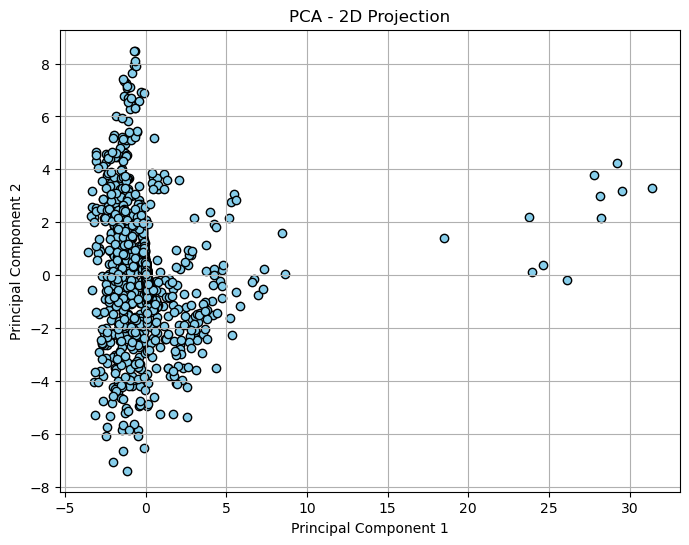

In [582]:
# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c="skyblue", edgecolor="black")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection")
plt.grid()
plt.show()


In [583]:
# Get the PCA loadings
loadings = pd.DataFrame(
    pca_reduced.components_.T,
    columns=[f"PC{i+1}" for i in range(n_components)],
    index=X_train.columns
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.060269,0.098923,-0.360204,0.176785,0.328133,-0.027376,0.075960,0.650953,0.437604,-0.058076,-0.259722
clearance_rate,0.038587,-0.114331,-0.045116,0.336478,0.281946,0.688155,0.427918,0.032251,-0.301324,0.001137,0.143283
population_density,-0.029593,0.191685,-0.293768,0.381849,0.140159,0.025570,-0.314830,-0.317909,0.085033,0.680653,0.064974
mobile_home_ratio,0.060420,-0.329323,0.322981,0.349205,0.094715,-0.253772,0.111790,-0.020179,-0.051128,0.199696,-0.328085
poverty_rate,0.019251,-0.456754,-0.207252,0.042622,0.171868,-0.115718,-0.112868,-0.147525,0.009312,-0.105859,0.183589
adjusted_income,-0.081822,0.473295,-0.063385,-0.079750,-0.109227,0.118076,0.034624,-0.026255,-0.115018,-0.026297,-0.142213
unemployment_rate,0.003200,-0.286444,-0.140373,-0.190480,-0.262249,0.317597,0.291289,-0.375961,0.478575,0.019759,-0.329294
high_school_rate,0.069292,0.227875,0.298126,0.058775,0.348858,-0.196600,0.318255,-0.261753,0.493767,-0.094447,0.455675
uninsured_rate,-0.012641,-0.305711,-0.373475,-0.104024,-0.308368,-0.148788,0.178010,0.170620,0.070553,0.276172,0.277839
house_affordability,-0.007769,0.303957,-0.275376,0.014172,-0.007536,-0.298629,0.492820,-0.271778,-0.122401,0.029625,-0.337698


### Scree and biplots
### Comparing principal components 1 & 2

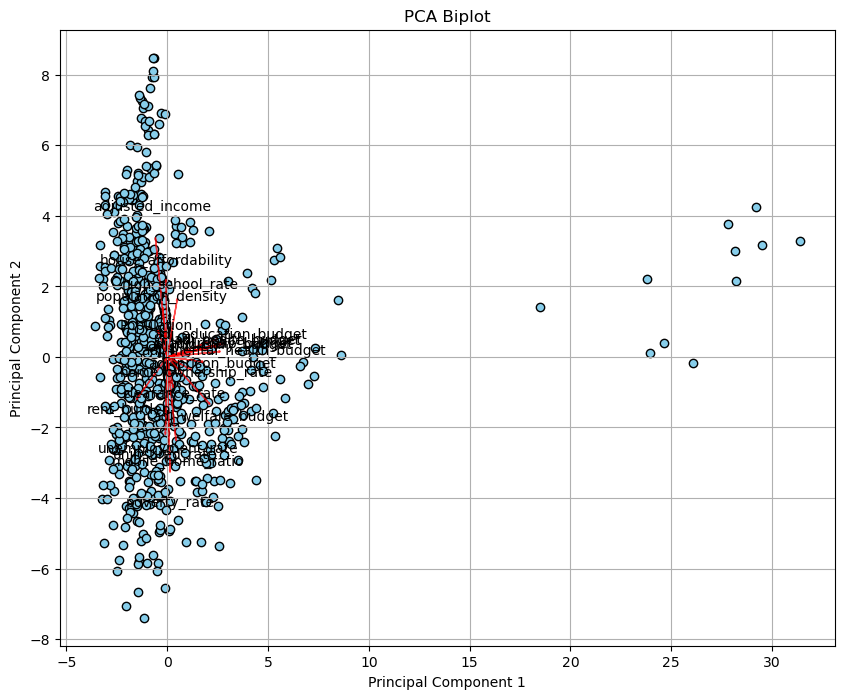

In [584]:
# Get feature loadings

# Plot biplot
plt.figure(figsize=(10, 8))

# Scatter plot of PCA scores (observations)
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c="skyblue", edgecolor="black")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Biplot")

# Add arrows for feature loadings (scaled for visibility)
scale_factor = 7
for i, feature in enumerate(X_train.columns):
    plt.arrow(0, 0, loadings['PC1'].iloc[i] * scale_factor, loadings[f'PC2'].iloc[i] * scale_factor, 
              color="red", alpha=0.7, head_width=0.05)
    plt.text(loadings['PC1'].iloc[i] * (scale_factor+2), loadings['PC2'].iloc[i] * (scale_factor+2), feature, color="black", ha="center", va="center")

plt.grid()
plt.show()


In [585]:
import numpy as np
import plotly.graph_objects as go

#`loadings` is PCA.components_.T
scaling_factor = 2
fig = go.Figure()

# Add loadings for top 3 PCs
for i, feature in enumerate(X_train.columns):
    fig.add_trace(go.Scatter3d(
        x=[0, loadings['PC1'].iloc[i] * scaling_factor]  ,
        y=[0, loadings['PC2'].iloc[i] * scaling_factor],
        z=[0, loadings['PC3'].iloc[i] * scaling_factor],
        mode="lines+text",
        line=dict(color="red", width=2),
        text=[None, feature],
        name=feature
    ))

# Update the layout
fig.update_layout(
    title="Loadings for Top 3 PCs",
    scene=dict(
        xaxis_title="PC1(x)",
        yaxis_title="PC2(y)",
        zaxis_title="PC3(z)"
    )
)
fig.show()


### Cross Validatons Perform manually

In [586]:

## Make a KFold object
## remember to set a random_state and set shuffle = True
num_splits = 5
num_models = 4
kfold = KFold(num_splits, random_state = 216, shuffle=True)

## This array will hold the mse for each model and split
rmses = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(X_train):
     ## cv training set
    X_tt, y_tt = X_train.iloc[train_index], y_train.iloc[train_index]
    
    ## cv holdout set
    X_ho, y_ho = X_train.iloc[test_index], y_train.iloc[test_index]
    
    

    mlr = LinearRegression()
    mlr.fit(X_tt[features], y_tt)
    rmses[0,i] = root_mean_squared_error(y_ho, mlr.predict(X_ho[features]))

    xgb_model = xgb.XGBRegressor(random_state=42)
    xgb_model.fit(X_tt[features], y_tt)
    rmses[1,i] = root_mean_squared_error(y_ho, xgb_model.predict(X_ho[features]))

    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
    ridge_pipe.fit(X_tt[features], y_tt)
    rmses[2,i] = root_mean_squared_error(y_ho, xgb_model.predict(X_ho[features]))
    
    
    pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(11)), ('reg', LinearRegression())])
    pca_pipe.fit(X_tt[features], y_tt)
    rmses[3,i] = root_mean_squared_error(y_ho, xgb_model.predict(X_ho[features]))
    


    i = i + 1

In [587]:
print(f"MLR Avg. CV MSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"XBG Avg. CV MSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"Ridge Avg. CV MSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"PCA_MLR Avg. CV MSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")


MLR Avg. CV MSE: 0.0014198331986845472 and STD: 0.0001249355294488362
XBG Avg. CV MSE: 0.0011774741362513225 and STD: 0.00012392315082825455
Ridge Avg. CV MSE: 0.0011774741362513225 and STD: 0.00012392315082825455
PCA_MLR Avg. CV MSE: 0.0011774741362513225 and STD: 0.00012392315082825455
